### Question 2  Convolution Neural Network

###### 2.1: Explanation of Design and Implementation Choices of your Model

Fashion MNIST dataset with a twist has dataset comprised of 60,000 small squareD 28×28 pixel grayscale images of items with five different types of clothing with the mapping from 0-4.Each pixel corresponds to one feature and in our data set we have 784 features to be considered. 

#### The libraries we are using:
  ###### Numpy:
  It is the core library for scientific computations in Python. It provides a high-performance multidimensional array object and tools for working with these arrays.
 ###### Pandas: 
 It is a library that provides us with the dataframe and helps us to analyze the dataset by providing functionality like describe,shape etc.In our assignment we have loaded the data into the dataframe by reading it from a CSV file.
###### Seaborn:
It is a python data visualization library that accepts only dataframe as input.It provides us with statistical graphs
###### Pyplot(MatplotLib):
It is a plotting library which allows you to plot 2D data
###### Sklearn libraries:
It is a machine learning library for data mining and analysis.We have used it for model selection,calculation of metrics,dimensionality reduction etc.
###### Keras:
It is a high level neural network API that runs on the top of TensorFlow.It supports building the baseline of the convolution network.
###### TensorFlow: 
It is a framework used to implement Convolution neural network.It helps to perform operations on the multi dimensional data array called as tensors.
###### Tqdm:
A library used to show the dynamic progress of our build cnn model.




#### IMPORTING THE NECCESSARY LIBRARIES

In [1]:
#importing the libraries
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#keras and tensorflow
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras import optimizers
from keras.callbacks import TensorBoard
from keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization 
from tqdm import tqdm

Using TensorFlow backend.


#### LOADING AND PREPARING THE DATASET WITH NORMALIZATION

##### Preparing the Data
The training data which is loaded from the train.csv file is split into training data set and validation dataset inorder to evaluate the model trained and tune the hyperparameters if need be.

We split the  given training data in 8:2 ration for training and validation respectively.The resulting shape of training dataset is 48000(Number of data points) * 784(Number of features) and the validation dataset is 12000*784.


The test data is loaded from testX.csv file and it contains 10000 data points.So the resulting shape of test data on which the prediction is to be done is 10000*784.

#### Normalization of Data
MNIST has gray scale images of 28*28 pixels so the pixel can take any value between 0 to 255 and hence we try to normalize or rescale the data to unit dimension so that the value lies between 0-1 which allows the gradient descent to converge faster thereby reducing the training time.

##### The Normalization techniques we have considered is :
###### Min-Max Normalization:
We divide each pixel value by  255 to bound the input value between 0-1

In [2]:
#Reading the csv files
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('testX.csv')
#preparing the data
train_data.drop(train_data.columns[[0]], axis = 1, inplace = True)
x_train=np.array(train_data.iloc[:,1:])
#normalizing the data to bound it between 0-1
x_train=x_train.astype('float32')
x_train=x_train/255
x_test=np.array(test_data.iloc[:,1:])
x_test=x_test.astype('float32')
x_test=x_test/255
x_train.shape
x_train_copy=x_train

In [3]:
#converting y data to categorical 
label=[]
label=train_data['Label']
label=label.values
y=to_categorical(label)
y
y_copy=y

#### CREATION OF VALIDATION DATASET
The need of the validation data set is that we dont have the classified target value for the test data and inorder to test our trained model we need a dataset for which the prediction is available.

In [4]:
#splitting the data into training and validation data set
ran = 42
x_train, x_val, y_train, y_val = train_test_split(x_train, y, test_size=0.2, random_state = ran)

#### Convolution Neural Network :(General choice of model for image classification)
CNN are fully connected networks where each neuron in one layer is connected to all neurons in the next layer.These networks use convolution operation where the input tensor with shape (number of images) x (image width) x (image height) x (image depth) after passing through a convolutional layer gets abstracted to a feature map, with shape (number of images) x (feature map width) x (feature map height) x (feature map channels). 

#### SETTING THE PARAMETERS AND RESHAPPING THE DATA FOR CNN MODEL

The input to the CNN needs to be reshaped to the format of (image height*image width*channels)

Image ht =28 <br>
Image wd =28<br>
Color channels=1(greyscale)

In [5]:
#setting image pixel to 28*28
rows=28
cols=28
channels=1 #color channels
image_shape=(rows,cols,channels)

#parameters to cnn
epoch=50
batchsize=256
augumentation=3 #no of augmentations to be done to the image
no_of_classes=5 #labels
num_blocks = 4
num_sub_blocks = 2
num_filters = 64
use_max_pool = False

#reshapping the image data to train the model
x_train=x_train.reshape(x_train.shape[0],rows,cols,1)
x_train_copy=x_train_copy.reshape(x_train_copy.shape[0],rows,cols,1)
x_test=x_test.reshape(x_test.shape[0],rows,cols,1)
x_val=x_val.reshape(x_val.shape[0],rows,cols,1)

print('x_train shape : {}'.format(x_train.shape))
print('x_test shape : {}'.format(x_test.shape))
print('x_val shape : {}'.format(x_val.shape))

x_train shape : (48000, 28, 28, 1)
x_test shape : (10000, 28, 28, 1)
x_val shape : (12000, 28, 28, 1)


#### CREATING A BASE MODEL OF CNN WITH RMSProp OPTIMIZER  (2.5.2 result analysis explained)
The simplest type of model is the linear stack of layers (Sequential model).

The cnn model model has two main aspects: the feature extraction front end comprised of convolutional and pooling layers, and the classifier backend that will make the prediction.

For the convolutional front-end, we start by adding convolutional layer with a small filter size (3,3) and a smaller number of filters (32) followed by a max pooling layer with the pool size 2.Classification Accuracy is one of the main goal of training a model (ie) metric that determines the number of correct predictions made out of the total number of predictions to be made.Classification Accuracy is one of the main goal of training a model (ie) metric that determines the number of correct predictions made out of the total number of predictions to be made.The activation fuction used is Relu.The filter map is then be flattened to provide features to the classifier.

Fashion Mnist is a multi-class classification to predict the probability distribution of an image belonging to each of the 5 different classes.This requires the use of a softmax activation function.Between the feature extractor and the output layer a dense layer with 128 filters is used to interpret the features.

We are using RMSProp optimizer for training the dataset with a learning rate of 0.001

Once the architecture is established we need to compile the model specifying our key aspect considered for the behaviour of the model.The two key aspects considered are loss fuction :categorical_crossentropy and metric:classification accuracy  

Categorical crossentropy is a loss function that is used for single label categorization. This is applied when only one category is applicable for each data point.

Classification Accuracy is one of the main goal of training a model (ie)a metric that determines the number of correct predictions made out of the total number of predictions to be made.

In [20]:
#implementation of baseline model of cnn
base_cnn=tf.keras.Sequential()
#adding default image dimension to be passed on every call
base_cnn.add(tf.keras.layers.InputLayer(image_shape))
#adding first layer Conv2D+MaxPooling2D
base_cnn.add(tf.keras.layers.Convolution2D(32,(3,3),padding='same',activation='relu'))
base_cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
#adding second layer Conv2D+MaxPooling2D
base_cnn.add(tf.keras.layers.Convolution2D(64,(3,3),padding='same',activation='relu'))
base_cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
#flatten (Converting to a 1D feature vector)
base_cnn.add(tf.keras.layers.Flatten())
#adding a fully connected layer
base_cnn.add(tf.keras.layers.Dense(128,activation='relu'))
#Calling Dropout to avoid overfitting
base_cnn.add(tf.keras.layers.Dropout(0.5))#value can be btw 0-1
#softmax
base_cnn.add(tf.keras.layers.Dense(5,activation='softmax'))
#using RMSProp optimizer with learning rate 0.001
op=optimizers.RMSprop(lr=0.001)
base_cnn.compile(loss='categorical_crossentropy',optimizer=op,metrics=['accuracy'])

##### Fitting the base model with 40 epochs

In [21]:
#fitting the model
history=base_cnn.fit(x_train,y_train,epochs=40,validation_data=[x_val,y_val])

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 49s 1ms/sample - loss: 0.6495 - acc: 0.7283 - val_loss: 0.4665 - val_acc: 0.8021
Epoch 2/40
48000/48000 [==============================] - 44s 917us/sample - loss: 0.4776 - acc: 0.8087 - val_loss: 0.3847 - val_acc: 0.8437
Epoch 3/40
48000/48000 [==============================] - 44s 916us/sample - loss: 0.4380 - acc: 0.8269 - val_loss: 0.4026 - val_acc: 0.8341
Epoch 4/40
48000/48000 [==============================] - 46s 968us/sample - loss: 0.4252 - acc: 0.8354 - val_loss: 0.4676 - val_acc: 0.8124
Epoch 5/40
48000/48000 [==============================] - 49s 1ms/sample - loss: 0.4157 - acc: 0.8401 - val_loss: 0.4007 - val_acc: 0.8410
Epoch 6/40
48000/48000 [==============================] - 49s 1ms/sample - loss: 0.4117 - acc: 0.8412 - val_loss: 0.4161 - val_acc: 0.8366
Epoch 7/40
48000/48000 [==============================] - 49s 1ms/sample - loss: 0.4117 - acc: 0.8440 - val_lo

#### PREDICTING THE ACCURACY OF A DATASET
To predict the class, we will find the largest value from the output layer tensord using tf.argmax()

In [9]:
#accuracy function
def accuracy(x,y):
    iter=0
    for i in tqdm(range(len(y))):
                  prediction=base_cnn.predict(x[i:i+1])
                  if np.argmax(prediction)==np.argmax(y[i]):
                       iter=iter+1
    return iter/len(y)

In [22]:
#calculating max accuracy on val dataset obtained
accuracy(x_val,y_val)

100%|██████████| 12000/12000 [00:30<00:00, 399.00it/s]


0.836

#### BASE MODEL RESULTS ON VALIDATION DATASET:
The base model is fitted on the 48000 data samples from the training dataset and when tested upon the 12000 data samples from the validation dataset the accuracy optained is 83.6 percentage.

In [23]:
#prediction on test data set
pred=base_cnn.predict(x_test)
pred=np.argmax(pred,axis=1)
df=pd.DataFrame(pred)
df.index+=0
df.index.name='Id'
df.columns=['Label']
df.to_csv('base_model',header='true')

#### BASE MODEL RESULTS ON TEST DATASET:
The trained base model is used to predict the labels of the 10000 data samples from the test data.The results were written into base_model.csv with the id and the label.Upon submission on kaggle the accuracy obtained on the test dataset was 77.16 percentage.

#### PLOTTING THE RESULTS

The metrics we are considering to evaluate the best model is accuracy and the loss function we are considering is categorical cross entropy. By minimizing the loss function we make sure that incorrect classifications are reduced.

Hence we are plotting two graphs comparing the epochs with accuracy and loss function respectively.

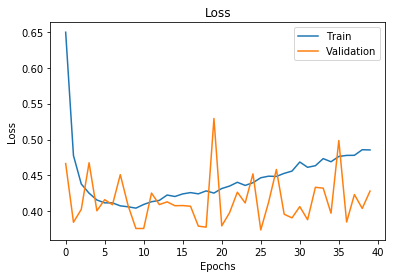

In [24]:
#graph plot for epochs and loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

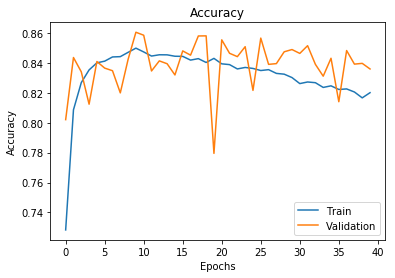

In [25]:
#graph plot for epochs and accuracy

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

##### GRAPH ANALYSIS

###### EPOCHS VS LOSS
When the model is new the loss function is more and as the number of epochs increases the loss function value is decreased.Minimizing the loss function is the goal of a best model.But after certain number of epochs is run the loss function again increases.This is because of the optimizer and the learning rate that we have used.The moment the local minimum is exceeded and a certain number of iterations, a small number is divided by an even smaller number and the loss value explodes.Fine tuning needs to be done in the model improvement.The current model works okay on the validation data set but the curve is not stable indicating that the model is unstable.So we need to regularize the model's parameters

###### EPOCHS VS ACCURACY
As the number of epochs increases the model learns from the training data and the accuracy increases gradually and it reaches a maximum at around 20 epochs after which the model overfits and the accuracy starts decreasing.To overcome this situation we can add regularizers or dropout laters to decrease the learning capacity of your model and stop training.

#### TUNING PARAMETERS TO BE CONSIDERED: (2.5.2 result analysis explained)

###### Number of filters
An increase in the number of filters used in the convolutional layer can often improve performance, as it can provide more opportunity for extracting simple features from the input images.

###### Epochs:
The number of times the training data is shown to the model.We need to chose an optimal value for the number of epochs inorder to avoid the problem of overfitting.(I have considered 80 epochs for training the model above which there in no significant increase in the accuracy and the model starts to overfit)

##### Optimizer:
There are various choices of optimizers namely Adam,SGD,RMSProp etc.I have tried RMSProp but it is said to have a lower convergence rate when compared to Adam.So after trying it on the base model on further improvised models we have considered Adam optimizer for cnn.

###### Learning Rate:
It is recommended that during training process it is better to specify a lower learning rate.We found during optimization that the learning rate of 0.001 improves the accuracy

##### Addition of Dropout layer:
The dropout regularizer helps to avoid the problem of overfitting by removing some connections from the neural network on every iteration.It is bound to take the value between 0-1.

##### Activation Function:
The various activation function available is Relu,Sigmoid,Tanh,LeakyRelu.
#### Relu is chosen as the best option available for Fashion MNIST 
because it tends to be fast and while training we are able to see that it helps the neural network to converge easily and reliably than the other activation functions

##### Adding padding convolutions
Adding padding to the convolutional operation can often result in better model performance, as more of the input image of feature maps are given an opportunity to participate or contribute to the output

By default, the convolutional operation uses ‘valid‘ padding, which means that convolutions are only applied where possible. This can be changed to ‘same‘ padding so that zero values are added around the input such that the output has the same size as the input.

We decided to furthur tune the cnn by adding an another convolution layer and adding droupout layer after each convolution made inorder to make the training easier and remove any unwanted connections in the network.

###### Reason for tuning hyperparamters:
To find right balance between bias and variance <br>
Speed up learning<br>
To solve the problem of vanishing or exploding gradient<br>

#### IMPROVISATON OF THE BASELINE MODEL WITH AN EXTRA CONVOLUTION LAYER AND FITTING THE MODEL WITH 40 EPOCHS  (2.5.2 result analysis explained)

In this model we have used three convolution layers with a dropout layer after every convolution.

we start off by adding convolutional layer with a small filter size (3,3) and a smaller number of filter - 32 followed by a max pooling layer with the pool size 2.After this convolution layer we add a dropot layer to avoid overfotting of data.Similarly two more convolution and pooling layers with higher number of filters and dropout is added.

The remaining layers are similar to the base model.We expect the accuracy to improve and the loss fuction to be minimized in this model.


In [14]:
#implementation of cnn with three layers
cnn_3=tf.keras.Sequential()
#adding first layer Conv2D+MaxPooling2D
cnn_3.add(tf.keras.layers.Convolution2D(32,(3,3),padding='same',activation='relu',input_shape=image_shape))
cnn_3.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
cnn_3.add(tf.keras.layers.Dropout(0.25))
#adding second layer Conv2D+MaxPooling2D
cnn_3.add(tf.keras.layers.Convolution2D(64,(3,3),padding='same',activation='relu'))
cnn_3.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
cnn_3.add(tf.keras.layers.Dropout(0.25))
#adding third layer Conv2D+MaxPooling2D
cnn_3.add(tf.keras.layers.Convolution2D(128,(3,3),padding='same',activation='relu'))
cnn_3.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
cnn_3.add(tf.keras.layers.Dropout(0.4))
#flatten (Converting to a 1D feature vector)
cnn_3.add(tf.keras.layers.Flatten())
#adding a fully connected layer
cnn_3.add(tf.keras.layers.Dense(128,activation='relu'))
#Calling Dropout to avoid overfitting
cnn_3.add(tf.keras.layers.Dropout(0.5))#value can be btw 0-1
#softmax
cnn_3.add(tf.keras.layers.Dense(5,activation='softmax'))
#using RMSProp optimizer with learning rate 0.001
op=optimizers.RMSprop(learning_rate=0.001)
cnn_3.compile(loss='categorical_crossentropy',optimizer=op,metrics=['accuracy'])

time: 7.29 s


In [15]:
#fitting the model
history3 = cnn_3.fit(X_train, y_train,
          batch_size=256,
          epochs=40,
          verbose=1,
          validation_data=(X_val, y_val))

Epoch 1/40
188/188 [==============================] - 5s 24ms/step - loss: 0.9835 - accuracy: 0.5712 - val_loss: 0.7016 - val_accuracy: 0.7157
Epoch 2/40
188/188 [==============================] - 4s 22ms/step - loss: 0.6931 - accuracy: 0.7087 - val_loss: 0.5429 - val_accuracy: 0.7849
Epoch 3/40
188/188 [==============================] - 4s 22ms/step - loss: 0.6077 - accuracy: 0.7480 - val_loss: 0.7379 - val_accuracy: 0.6694
Epoch 4/40
188/188 [==============================] - 4s 22ms/step - loss: 0.5609 - accuracy: 0.7677 - val_loss: 0.5226 - val_accuracy: 0.7782
Epoch 5/40
188/188 [==============================] - 4s 22ms/step - loss: 0.5286 - accuracy: 0.7822 - val_loss: 0.4251 - val_accuracy: 0.8291
Epoch 6/40
188/188 [==============================] - 4s 21ms/step - loss: 0.5066 - accuracy: 0.7928 - val_loss: 0.4154 - val_accuracy: 0.8348
Epoch 7/40
188/188 [==============================] - 4s 22ms/step - loss: 0.4812 - accuracy: 0.8030 - val_loss: 0.3887 - val_accuracy: 0.8451

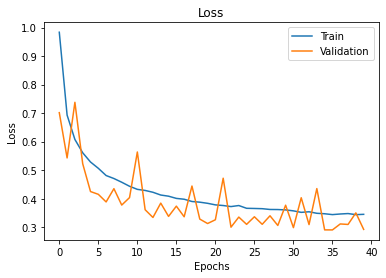

time: 253 ms


In [16]:
#graph plot for epochs and loss

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title("Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

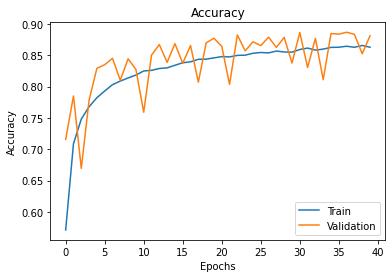

time: 231 ms


In [17]:
#graph plot for epochs and accuracy

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

##### GRAPH ANALYSIS

###### EPOCHS VS LOSS
For the initial epochs the loss value is more and as the number of epochs increases it slowly approaches to zero which is a good indication.The current model works better than the base model on the validation data set but the curve is still unstable indicating that we still need to finetune the data.

###### EPOCHS VS ACCURACY
As the number of epochs increases the model learns from the training data and the accuracy increases gradually and it reaches upto 88 percentage at the 40th iteration.The classication done on the validation dataset is better than the previous basemodel.

In [20]:
def accuracy(x,y):
    iter=0
    for i in tqdm(range(len(y))):
                  prediction=cnn_3.predict(x[i:i+1])
                  if np.argmax(prediction)==np.argmax(y[i]):
                       iter=iter+1
    return iter/len(y)
from tqdm import tqdm
#calculating max accuracy on val dataset obtained
accuracy(X_val, y_val)

100%|██████████| 12000/12000 [06:02<00:00, 33.10it/s]


0.881

time: 6min 2s


#### THREE LAYER CNN RESULTS ON VALIDATION DATASET:
The current model is fitted on the 48000 data samples from the training dataset and when tested upon the 12000 data samples from the validation dataset the accuracy optained is 88.1 percentage which is an improvement of five percent from the previous base model.

#### PREDICTION ON THE TEST DATA SET

In [37]:
#predicting the labels for the test data set
pred=cnn_3.predict(testX_norm)
pred=np.argmax(pred,axis=1)
df=pd.DataFrame(pred)
df.index+=0
df.index.name='Id'
df.columns=['Label']
df.to_csv('cnn_3',header='true')

time: 609 ms


######  THREE LAYER CNN RESULTS ON TEST DATASET:

While testing the prediction result on Kaggle the accuracy improved to 83.74 percentage.Still we need to find a perfect tradeoff by trial and error method while adding convolution and dropout layers to improvise our model.Generally adding an additional layer helps us to extract the feature better from the data(Only upto a limit) but here it will result in overfitting.So,Inorder to solve this probelm we introduce batch normalization in the next improvization.

### CNN MODEL GIVING MAXIMUM ACCURACY  (2.5.2 result analysis explained)

In this model we have used four convolution layers with a dropout layer after every convolution.BatchNormalization is used in each layer.

###### BATCH NORMALIZATION - RECENTERING AND RESCALING TO STANDARD DEVIATION OF 1
Batch normalization helps us to increase the stability of the neural network by normalizing the inputs of each layer.Batch Normalization is done before the dropout layer where we normalize the output of one layer before feeding it as the input to the next layer

Before the softmax classification layer is added,we have defined two fully connected dense layer with 512 and 128 filters correspondingly.

In addition to that we have used the adam optimizer with a learning rate of 0.001 inorder to develop a stable model


In [9]:
#Best fit
#Building a model (we are using sequential model in which we ll be adding layers)
cnn=tf.keras.Sequential()
#adding default image dimension to be passed on every call
cnn.add(tf.keras.layers.InputLayer(image_shape))

In [10]:
#adding first layer Conv2D+MaxPooling2D
cnn.add(tf.keras.layers.Convolution2D(32,(3,3),padding='same',activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())

In [11]:
cnn.add(tf.keras.layers.Convolution2D(32,(3,3),padding='same',activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #strides=2 preferable
cnn.add(tf.keras.layers.Dropout(0.25))#value can be btw 0-1

In [12]:
#adding third layer Conv2D+MaxPooling2D
cnn.add(tf.keras.layers.Convolution2D(64,(3,3),padding='same',activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dropout(0.25))#value can be btw 0-1

In [13]:
#adding third layer Conv2D+MaxPooling2D
cnn.add(tf.keras.layers.Convolution2D(128,(3,3),padding='same',activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #strides=2 preferable
cnn.add(tf.keras.layers.Dropout(0.25))#value can be btw 0-1

In [14]:
#flatten (Converting to a 1D feature vector)
cnn.add(tf.keras.layers.Flatten())

In [15]:
#adding a fully connected layer
cnn.add(tf.keras.layers.Dense(512,activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
#Calling Dropout to avoid overfitting
cnn.add(tf.keras.layers.Dropout(0.5))#value can be btw 0-1

In [16]:
#adding another fully connected layer
cnn.add(tf.keras.layers.Dense(128,activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
#Calling Dropout to avoid overfitting
cnn.add(tf.keras.layers.Dropout(0.5))#value can be btw 0-1

In [17]:
#softmax
cnn.add(tf.keras.layers.Dense(5,activation='softmax'))

In [18]:
#compiling the cnn model
op=optimizers.Adam(lr=0.001)
cnn.compile(loss='categorical_crossentropy',optimizer=op,metrics=['accuracy'])

#### FITTING THE MODEL WITH 80 EPOCHS

In [58]:
#fitting the cnn model
history=cnn.fit(x_train,y_train,epochs=80,validation_data=[x_val,y_val])

Train on 48000 samples, validate on 12000 samples
Epoch 1/80
48000/48000 [==============================] - 205s 4ms/sample - loss: 0.7338 - accuracy: 0.7091 - val_loss: 0.4565 - val_accuracy: 0.8120
Epoch 2/80
48000/48000 [==============================] - 201s 4ms/sample - loss: 0.5399 - accuracy: 0.7800 - val_loss: 0.4205 - val_accuracy: 0.8359
Epoch 3/80
48000/48000 [==============================] - 194s 4ms/sample - loss: 0.5020 - accuracy: 0.7991 - val_loss: 0.4243 - val_accuracy: 0.8266
Epoch 4/80
48000/48000 [==============================] - 198s 4ms/sample - loss: 0.4613 - accuracy: 0.8140 - val_loss: 0.4251 - val_accuracy: 0.8255
Epoch 5/80
48000/48000 [==============================] - 233s 5ms/sample - loss: 0.4484 - accuracy: 0.8207 - val_loss: 0.3353 - val_accuracy: 0.8590
Epoch 6/80
48000/48000 [==============================] - 230s 5ms/sample - loss: 0.4230 - accuracy: 0.8335 - val_loss: 0.3637 - val_accuracy: 0.8510
Epoch 7/80
48000/48000 [==========================

Epoch 55/80
48000/48000 [==============================] - 209s 4ms/sample - loss: 0.1627 - accuracy: 0.9375 - val_loss: 0.2469 - val_accuracy: 0.9075
Epoch 56/80
48000/48000 [==============================] - 208s 4ms/sample - loss: 0.1595 - accuracy: 0.9402 - val_loss: 0.2555 - val_accuracy: 0.9079
Epoch 57/80
48000/48000 [==============================] - 194s 4ms/sample - loss: 0.1617 - accuracy: 0.9381 - val_loss: 0.2508 - val_accuracy: 0.9093
Epoch 58/80
48000/48000 [==============================] - 216s 4ms/sample - loss: 0.1580 - accuracy: 0.9409 - val_loss: 0.3180 - val_accuracy: 0.8835
Epoch 59/80
48000/48000 [==============================] - 222s 5ms/sample - loss: 0.1580 - accuracy: 0.9403 - val_loss: 0.2440 - val_accuracy: 0.9090
Epoch 60/80
48000/48000 [==============================] - 209s 4ms/sample - loss: 0.1560 - accuracy: 0.9418 - val_loss: 0.2484 - val_accuracy: 0.9074
Epoch 61/80
48000/48000 [==============================] - 208s 4ms/sample - loss: 0.1539 - ac

In [59]:
def accuracy(x,y):
    iter=0
    for i in tqdm(range(len(y))):
                  prediction=cnn.predict(x[i:i+1])
                  if np.argmax(prediction)==np.argmax(y[i]):
                       iter=iter+1
    return iter/len(y)

In [60]:
#calculating max accuracy on val dataset obtained
accuracy(x_val,y_val)

100%|██████████| 12000/12000 [07:11<00:00, 27.79it/s]


0.9121666666666667

##### FOUR LAYER CNN RESULTS ON VALIDATION DATASET
The current model is fitted on the 48000 data samples from the training dataset and when tested upon the 12000 data samples from the validation dataset the accuracy optained is 91.21 percentage which is an improvement of three percent from the previous three layer model.

In [61]:
#prediction on test data
pred=cnn.predict(x_test)
pred=np.argmax(pred,axis=1)
df=pd.DataFrame(pred)
df.index+=0
df.index.name='Id'
df.columns=['Label']
df.to_csv('result_trail_1',header='true')

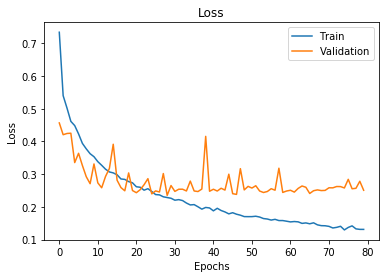

In [62]:
#graph plot for epochs and loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

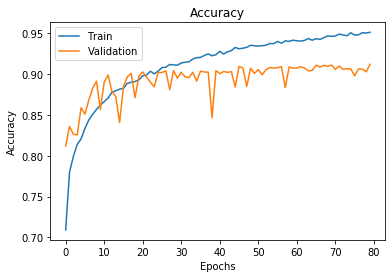

In [63]:
#graph plot for epochs and accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

##### GRAPH ANALYSIS

###### EPOCHS VS LOSS
For the initial epochs the loss value is more and as the number of epochs increases the loss value decreases but around 30-35 epoch the local minima is optained and the model becomes overfit and the loss value gets stuck in the local minima.So tuning the model till 35 epochs gives a better model.

###### EPOCHS VS ACCURACY
As the number of epochs increases the model learns from the training data and the accuracy increases gradually and it reaches upto 90 percentage at the 40th iteration.The classication done on the validation dataset is better than the previous basemodel.After 40 epochs the model overfits.

#####  2.4 KAGGLE SUBMISSION - FOUR LAYER CNN ON TEST DATA
In this model,we have used four convolution layers with batch normalization and dropout after every layer along with adam optimizer.Intially when ran for test data prediction the acuracy obtained was 85.42 after fine tuning the batch size,drop out values and adding fully connected layer the accuracy improved to 89 percent and further by adding learning rate for adam optimizer the final improved accuracy obtained was 90.92.The acCuracy improvement and the minimization of the loss function is achieved.

#### OTHER ALTERNATIVES TO CNN

Fashion MNIST is a image classification probelm.The CNNs have several different filters/kernels consisting of trainable parameters which can convolve on a given image spatially to detect features like edges and shapes. These high number of filters essentially learn to capture spatial features from the image based on the learned weights through back propagation and stacked layers of filters can be used to detect complex spatial shapes from the spatial features at every subsequent level.

However there are other solutions to image classification like AlexNet,LeNet,VGG16,VGG19,RESNET etc

We have tried and implemented vgg19 and resnet model using transfer learning

##### TRANSFER LEARNING
A pre-trained network is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task. If this original dataset is large enough and general enough, then the spatial hierarchy of features learned by the pre-trained network can effectively act as a generic model of the data.We are using Imagenet for vgg19


##### IMPLEMENTATION OF PRE-TRAINED VGG19  (2.5.2 result analysis explained)

VGG-19 is a convolutional neural network that is 19 layers deep.It requires data to be reshaped to three color channels.Before the input tensor is passes into the neural network we need to reshape the data to 150 x 150 pixels.Because of this reshaping of the input tensors vgg-19 is more memory consuming.So,I have took a subset of the data (10000 samples) into consideration to implement vgg19.Further this 10000 dataset is split into training and validation dataset.Once the pretrained model is build a fully connected softmax dense layer is added and the adam optimizer is initialized.

In [0]:
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import MaxPooling2D, AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.utils import to_categorical
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


time: 1.6 s


In [0]:
#Loading the dataset Fashion MNIST
train_data=pd.read_csv("train/train.csv")
test_data=pd.read_csv("test/testX.csv")


time: 5.81 s


In [0]:
df_train=train_data.copy()
df_test=test_data.copy()

print("Train:",df_train.shape)
print("Test:",df_test.shape)
df_train.drop('Id',axis=1,inplace=True)


Train: (60000, 786)
Test: (10000, 785)
time: 315 ms


In [0]:
#Features and label split
X=df_train.iloc[0:10000,1:]
y=df_train['Label'].iloc[0:10000]
X_test=df_test.iloc[0:10000,1:]

time: 4.55 ms


In [0]:
# one hot encode target values
trainY = to_categorical(y,num_classes=5)
trainY.shape

(10000, 5)

time: 4.05 ms


In [0]:
# Convert the training and test images into 3 channels
X = np.dstack([X] * 3)
X_test = np.dstack([X_test]*3)

# Display their new shapes
X.shape, X_test.shape

((10000, 784, 3), (10000, 784, 3))

time: 204 ms


In [0]:
# Reshape images as per the tensor format required by tensorflow
X = X.reshape(-1, 28,28,3)
X_test= X_test.reshape (-1,28,28,3)

# Display the new shape
X.shape, X_test.shape

((10000, 28, 28, 3), (10000, 28, 28, 3))

time: 5.9 ms


In [0]:
# Resize the images as 150 * 150 as required by VGG19
from keras.preprocessing.image import img_to_array, array_to_img

X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((150,150))) for im in X])
X_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((150,150))) for im in X_test])

# Display the new shape
X.shape, X_test.shape

((10000, 150, 150, 3), (10000, 150, 150, 3))

time: 38.1 s


In [0]:
# Normalise the data and change data type
X = X.astype('float32')
X /= 255

X_test = X_test.astype('float32')
X_test /= 255

time: 2.3 s


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, trainY, test_size=0.2, random_state=42)

# Check the data size whether it is as per tensorflow and VGG19 requirement
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((8000, 150, 150, 3), (2000, 150, 150, 3), (8000, 5), (2000, 5))

time: 1.11 s


In [0]:
from keras.applications import VGG19
# Create the base model of VGG19
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape = (150, 150, 3), classes = 5)

80142336/80134624 [==============================] - 3s 0us/step
time: 10.8 s


In [0]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
from keras.applications.vgg19 import preprocess_input

# Preprocessing the input 
X_train = preprocess_input(X_train)
X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test)

time: 2.31 s


In [0]:
# Extracting features
train_features = vgg19.predict(np.array(X_train), batch_size=256, verbose=1)
test_features = vgg19.predict(np.array(X_test), batch_size=256, verbose=1)
val_features = vgg19.predict(np.array(X_val), batch_size=256, verbose=1)

2000/2000 [==============================] - 18s 9ms/step
time: 2min 11s


In [0]:
# Saving the features so that they can be used for future
np.savez("train_features", train_features, y_train)
np.savez("val_features", val_features, y_val)

time: 957 ms


In [0]:
# Current shape of features
print(train_features.shape, "\n",  test_features.shape, "\n", val_features.shape)

(8000, 4, 4, 512) 
 (10000, 4, 4, 512) 
 (2000, 4, 4, 512)
time: 1.53 ms


In [0]:
# Flatten extracted features
train_features = np.reshape(train_features, (8000, 4*4*512))
test_features = np.reshape(test_features, (10000, 4*4*512))
val_features = np.reshape(val_features, (2000, 4*4*512))

time: 1.81 ms


In [0]:
from keras.layers import Dense, Dropout
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers

# Add Dense and Dropout layers on top of VGG19 pre-trained
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation="softmax"))

time: 42.8 ms


In [0]:
import keras
op=optimizers.Adam(learning_rate=0.001)
# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=op,
              metrics=['accuracy'])

time: 60.4 ms


In [0]:
# Train the the model
history = model.fit(train_features, y_train,
          batch_size=256,
          epochs=40,
          verbose=1,
          validation_data=(val_features, y_val))

Train on 8000 samples, validate on 2000 samples
Epoch 1/40
8000/8000 [==============================] - 1s 67us/step - loss: 1.2817 - accuracy: 0.4354 - val_loss: 1.2376 - val_accuracy: 0.4895
Epoch 2/40
8000/8000 [==============================] - 1s 65us/step - loss: 1.2548 - accuracy: 0.4457 - val_loss: 1.1909 - val_accuracy: 0.4830
Epoch 3/40
8000/8000 [==============================] - 1s 64us/step - loss: 1.2206 - accuracy: 0.4564 - val_loss: 1.1598 - val_accuracy: 0.5045
Epoch 4/40
8000/8000 [==============================] - 1s 63us/step - loss: 1.2102 - accuracy: 0.4658 - val_loss: 1.1695 - val_accuracy: 0.5060
Epoch 5/40
8000/8000 [==============================] - 1s 63us/step - loss: 1.1978 - accuracy: 0.4664 - val_loss: 1.1374 - val_accuracy: 0.5265
Epoch 6/40
8000/8000 [==============================] - 0s 62us/step - loss: 1.1951 - accuracy: 0.4667 - val_loss: 1.1220 - val_accuracy: 0.5215
Epoch 7/40
8000/8000 [==============================] - 0s 62us/step - loss: 1.189

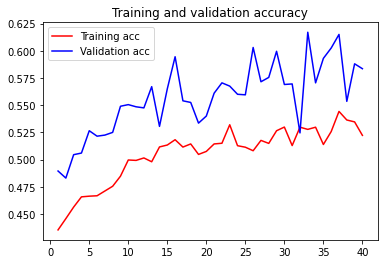

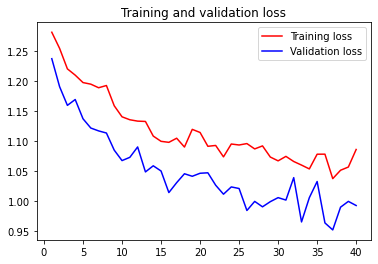

time: 445 ms


In [0]:
# plot the loss and accuracy
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

##### GRAPH ANALYSIS
VGG 19 provides a very bad accuracy for fashion MNIST.For a pretrained model of vgg19 the same number of epochs as the other cnn ran is being run but the accuracy obtained is as low as 55 percent in training dataset as well as test and validation sets.So,VGG19 is unfit for Fashion MNIST dataset.

In [0]:

def accuracy(x,y):
    iter=0
    for i in tqdm(range(len(y))):
                  prediction=model.predict(x[i:i+1])
                  if np.argmax(prediction)==np.argmax(y[i]):
                       iter=iter+1
    return iter/len(y)

time: 2.84 ms


In [0]:
from tqdm import tqdm
#calculating max accuracy on val dataset obtained
accuracy(val_features, y_val)

100%|██████████| 2000/2000 [00:03<00:00, 660.15it/s]


0.5835

time: 3.04 s


##### VGG19 RESULTS ON VALIDATION AND TEST DATA SET
The pretrained model gives a very less accuracy and uses RAM to the peak because of the tensor shapes.The accuracy obtained is as low as 55 percentage.

#### RESNET-50 IMPLEMENTATION  (2.5.2 result analysis explained)

ResNet-50 is a convolutional neural network that is 50 layers deep.ResNet uses skip connection to add the output from an earlier layer to a later layer. This helps it mitigate the vanishing gradient problem that generally occurs in a deep neural network.We are using an already published RESNET-50 architecture for implementation.

In [6]:
from keras.applications.resnet50 import preprocess_input, decode_predictions
#Data handling with table-like data structures
import pandas as pd
import numpy as np
import math

#Modelling Helpers
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA

#Preprocessing
from sklearn.feature_selection import chi2

#Evaluation metrics:
from sklearn.metrics import accuracy_score,precision_score,precision_recall_curve,recall_score,f1_score,plot_roc_curve 

#Deep learning 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import MaxPooling2D, AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model

#Visulization
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

Using TensorFlow backend.


time: 1.82 s


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
#Loading the dataset Fashion MNIST
train_data=pd.read_csv("train/train.csv")
test_data=pd.read_csv("test/testX.csv")

df_train=train_data.copy()
df_test=test_data.copy()

print("Train:",df_train.shape)
print("Test:",df_test.shape)
df_train.drop('Id',axis=1,inplace=True)

df_train.head()

Train: (60000, 786)
Test: (10000, 785)


,Label,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,44,48,147,59,0,78,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,189,113,111,113,27,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,98,33,70,72,74,46,68,37,40,31,9,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


time: 4.45 s


In [8]:
#Features and label split
X=df_train.iloc[:,1:]
y=df_train['Label']

X_test=df_test.iloc[:,1:]

# Train and validation split function

def trainValSplit(x_data,seed=42):

    #Train and Validation Splitting
    X_train, X_val, y_train, y_val = train_test_split(x_data, y, test_size=0.2, random_state=seed)
        
    return X_train, X_val, y_train, y_val 

time: 4.63 ms


In [9]:
X_train, X_val, y_train, y_val = trainValSplit(X)

# reshape dataset to have a single channel
trainX = X.values.reshape((-1, 28, 28, 1))

testX = X_test.values.reshape((-1, 28, 28, 1))

# one hot encode target values
trainY = to_categorical(y,num_classes=5)


time: 267 ms


In [10]:
trainX_norm=trainX.astype("float32")/255

testX_norm=testX.astype("float32")/255

time: 121 ms


In [11]:
# To train on ResNet50 model pad zeros to make 28*28*1 array to 32*32*3 array
trainX_norm = np.pad(trainX_norm,((0,0),(2,2),(2,2),(1,1)), mode='constant', constant_values=0)
testX_norm = np.pad(testX_norm,((0,0),(2,2),(2,2),(1,1)), mode='constant', constant_values=0)


print('X_train shape:{}'.format(trainX_norm.shape))
print('X_test shape:{}'.format(testX_norm.shape))


X_train shape:(60000, 32, 32, 3)
X_test shape:(10000, 32, 32, 3)
time: 591 ms


In [12]:
import tensorflow as tf
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D, Flatten

resnet_model=ResNet50(weights='imagenet', include_top=False, input_shape=(32,32,3))

model=Sequential()
model.add(resnet_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(.3))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax'))
for layer in resnet_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False


model.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 2s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1, 1, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               524544    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 24,114,565
Trainable params: 579,461
Non-

In [13]:
# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['accuracy'])

time: 44.5 ms


In [15]:
# Train the model
history = model.fit(trainX_norm, trainY,
         batch_size=64, epochs=30,
         validation_split=0.2,
         verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 61s 1ms/step - loss: 0.8442 - accuracy: 0.6614 - val_loss: 17.0560 - val_accuracy: 0.1240
Epoch 2/30
48000/48000 [==============================] - 46s 969us/step - loss: 0.6116 - accuracy: 0.7464 - val_loss: 0.5339 - val_accuracy: 0.7763
Epoch 3/30
48000/48000 [==============================] - 46s 965us/step - loss: 0.5322 - accuracy: 0.7801 - val_loss: 0.4702 - val_accuracy: 0.8025
Epoch 4/30
48000/48000 [==============================] - 47s 974us/step - loss: 0.4806 - accuracy: 0.8024 - val_loss: 0.4386 - val_accuracy: 0.8200
Epoch 5/30
48000/48000 [==============================] - 46s 968us/step - loss: 0.4538 - accuracy: 0.8124 - val_loss: 0.4187 - val_accuracy: 0.8258
Epoch 6/30
48000/48000 [==============================] - 47s 969us/step - loss: 0.4287 - accuracy: 0.8242 - val_loss: 0.4094 - val_accuracy: 0.8325
Epoch 7/30
48000/48000 [==============================] -

In [16]:
pred=model.predict(testX_norm)
pred=np.argmax(pred,axis=1)
df=pd.DataFrame(pred)
df.index+=0
df.index.name='Id'
df.columns=['Label']
df.to_csv('res_2.csv',header='true')

time: 6.52 s


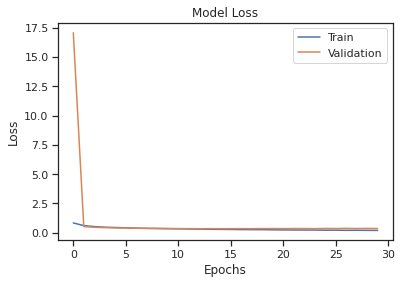

time: 174 ms


In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

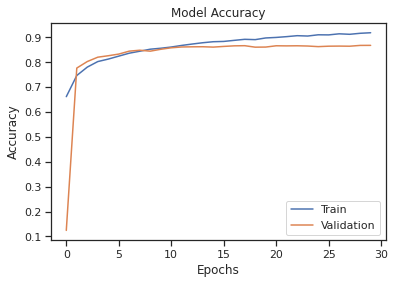

time: 144 ms


In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

##### GRAPH ANALYSIS
###### EPOCHS VS LOSS
The validation dataset predictions are very good in resnet pretrained imagenet model.As the number of epochs increases both the training and the validation datset approaches zero and the validation data set closely follows the training datset indicating a good fit.
###### EPOCHS VS ACCURACY
The maximum accuracy obtained in the validation dataset by the resnet is 86 percentage.As the number of epochs increases the accuracy gradually increases and smoothens out.

Because of memory and time constraint we have tried till 30 epochs and have used resnet 50.If we use resnet with more number of layers and tune the parameters it might give a better accuracy than the cnn model we have defined.

In [38]:

def accuracy(x,y):
    iter=0
    for i in tqdm(range(len(y))):
                  prediction=model.predict(x[i:i+1])
                  if np.argmax(prediction)==np.argmax(y[i]):
                       iter=iter+1
    return iter/len(y)

time: 3.25 ms


In [39]:
from tqdm import tqdm
#calculating max accuracy on val dataset obtained
accuracy(X_val, y_val)

100%|██████████| 12000/12000 [01:13<00:00, 164.37it/s]


0.8679166666666667

time: 1min 13s


##### RESNET 50 RESULTS ON TEST DATA
On uploading the predicted csv file in kaggle the accuracy obtained was 85.78 percentage for the test data set.

#### 2.5 RESULT ANALYSIS
1) Classification Accuracy for Different Models

| MODEL| TRAINING | VALIDATION | TESTING
|------|------|------|------|
|  BaseModel(40 epochs) | 82 | 83 | 77.16 
|  cnn_3 (40 epochs)  | 86 | 88 | 83.74
|  cnn_4 (80 epochs) |95.15  | 91 | 90.92
|  Resnet-50 (30 epochs)| 91.82 | 86.75 | 85.78
|  VGG19 (40 epochs)  | 52 | 58| 56.78

2) Comparison of the different algorithms and parameters that i have tried is explained in the flow of code given above.

3)The Best model obtained in our implementation is the convolution neural network with four layers.In this model we have used four convolution layers with a dropout layer after every convolution.BatchNormalization is used in each layer.

Before the softmax classification layer is added,we have defined two fully connected dense layer with 512 and 128 filters correspondingly.

In addition to that we have used the adam optimizer with a learning rate of 0.001 inorder to develop a stable model.This achieved an accuracy of 90.92 in the test data set

4)Graph plots and its analysis are given above after every model fit and prediction

### Runtime analysis for training model 

| MODEL| AVERAGE TIME/EPOCH IN GPU
|------|------|
|  BaseModel(40 epochs) | 2-3 s/epoch 
|  cnn_3 (40 epochs)  | 6 s/epoch 
|  cnn_4 (80 epochs) | 50 s/epoch 
|  Resnet-50 (30 epochs)| 35 s/epoch 
|  VGG19 (40 epochs)  | 2 s/epoch 

Eventhough the training time for BaseModel,cnn_3 and VGG19 is less the accuracy achieved is not satisfiable.Inaddition to that the memory requirement of Resnet 50 and VGG19 is and preparing the data to pass to the model takes a lot of preprocessing effort and increases complexity.Considering classification accuracy,implementation,minimizing the loss value we consider cnn with four convolution layers and two fully connected layer to be a better model for Fashion MNIST.